In [1]:
#Import all libraries necessary for coding
from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from matplotlib.colors import ListedColormap


In [2]:
#Classes with definitions to build the perceptron model
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)




In [3]:

#funcion to plot the decision region
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())


    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')


In [4]:
#funcion to clean only the data for graphics
def exclude_column(input_file, column_index):
    # Read CSV into a DataFrame
    df = pd.read_csv(input_file)
    # Drop the column specified by column_index
    df.drop(df.columns[column_index], axis=1, inplace=True)
    return df



In [ ]:
#funcion to plot graphics of selected csv files
def plotter(csv_files):
    column_names = ['total', 'x', 'y', 'z']
    for input_file in csv_files:
        df = exclude_column(input_file, 0)  # Assuming the time column is always at index 0
        df.columns = column_names
        for column_name in df.columns:
            plt.plot(df.index, df[column_name], label=column_name)
        plt.xlabel('Index')
        plt.ylabel('Values')
        plt.title(f'Line Graph for {input_file}')
        plt.legend()
        plt.grid(True)
        plt.show()

In [5]:
#extract the csv files from web page with the library 'beautiful soup'

# Disable SSL certificate verification
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = input('Enter URL: ')
html = urlopen(url, context=ctx).read()
soup = BeautifulSoup(html, "html.parser")

# Find all <a> tags
tags = soup.find_all('a')

# Loop through each <a> tag
for tag in tags:
    # Get the href attribute value
    link = tag.get('href')
    # Check if the link ends with .csv (assuming it's a CSV file)
    if link.endswith('acc.csv'):
        # Download the CSV file
        csv_file = requests.get(link)
        # Extract the filename from the URL
        filename = os.path.basename(link)
        # Save the file
        with open(filename, 'wb') as f:
            f.write(csv_file.content)

####url: http://fenix.ur.edu.pl/~mkepski/ds/uf.html

Enter URL: http://fenix.ur.edu.pl/~mkepski/ds/uf.html


In [6]:
#create a directory where the csv files will be saved
directory = '/content'

# Get a list of all CSV files in the directory in alphabetical order
csv_files = [file for file in os.listdir(directory) if file.endswith('acc.csv')]
csv_files.sort()



In [ ]:


# Create a list of accelerometer data files for both adl and fall to plot graphics
csv_files_adl = ['adl-01-acc.csv', 'adl-02-acc.csv', 'adl-03-acc.csv', 'adl-04-acc.csv', 'adl-05-acc.csv', 'adl-06-acc.csv', 'adl-07-acc.csv', 'adl-08-acc.csv', 'adl-09-acc.csv', 'adl-10-acc.csv']
csv_files_fall = ['fall-01-acc.csv', 'fall-02-acc.csv', 'fall-03-acc.csv', 'fall-04-acc.csv', 'fall-05-acc.csv', 'fall-06-acc.csv', 'fall-07-acc.csv', 'fall-08-acc.csv', 'fall-09-acc.csv', 'fall-10-acc.csv']

# Plot for adl data
plotter(csv_files_adl)

# Plot for fall data
plotter(csv_files_fall)

In [8]:

#create a list of csv files
statistics = []

# Loop through each CSV file
for file in csv_files:
  file_path = os.path.join(directory, file)
  df = pd.read_csv(file_path)

  means_total = df.iloc[:, 1].mean()
  max_total = df.iloc[:, 1].max()
  min_total = df.iloc[:, 1].min()

  means_x = df.iloc[:, 2].mean()
  max_x = df.iloc[:, 2].max()
  min_x = df.iloc[:, 2].min()

  means_y = df.iloc[:, 3].mean()
  max_y = df.iloc[:, 3].max()
  min_y = df.iloc[:, 3].min()

  means_z = df.iloc[:, 4].mean()
  max_z = df.iloc[:, 4].max()
  min_z = df.iloc[:, 4].min()

  statistics.append([means_total, max_total, min_total,
                       means_x, max_x, min_x,
                       means_y, max_y, min_y,
                       means_z, max_z, min_z])

# Create a DataFrame from the statistics list
columns = ['means_total', 'max_total', 'min_total',
           'means_x', 'max_x', 'min_x',
           'means_y', 'max_y', 'min_y',
           'means_z', 'max_z', 'min_z']

df_statistics = pd.DataFrame(statistics, columns=columns)

#create a matrix[70x1] with values 1 for fall and 0 for not fall
values = [-1] * 40 + [1] * 30
df_matrix = pd.DataFrame({'column_name': values})


In [9]:
#convert from DataFrame to numpy
np_array = df_statistics.to_numpy()
Y = df_matrix.to_numpy()

#get two features from the df_statistics
select_features = np_array[:, [1,8]]




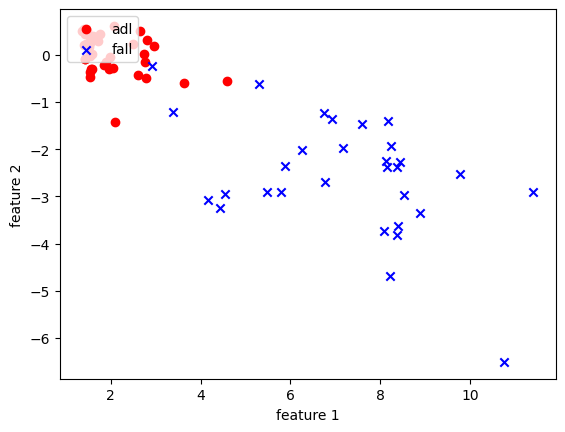

(70, 2)

In [10]:
# plot selected features and classes
plt.scatter(select_features[0:39, 0], select_features[0:39, 1],
            color='red', marker='o', label='adl')
plt.scatter(select_features[40:70, 0], select_features[40:70, 1],
            color='blue', marker='x', label='fall')

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='upper left')

plt.show()

select_features.shape



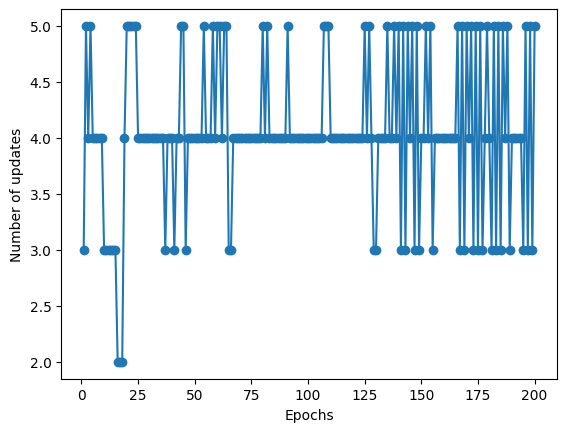

In [11]:
 ### Training the perceptron model

ppn = Perceptron(eta=0.001, n_iter=200)
y = Y.ravel()
y.shape
ppn.fit(select_features, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()


<ipython-input-3-46e36097f527>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


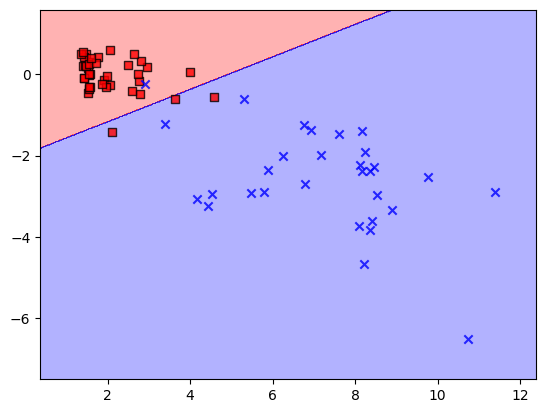

In [12]:
#plot the decision regions
plot_decision_regions(select_features,  y, classifier=ppn)

